In [3]:
#STEP 1 IMPORTING LIBRARIES

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()
#import plotly.express as px
import numpy as np # linear algebra
import pandas as pd
import warnings
from imblearn.over_sampling import SMOTE
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [5]:
#STEP 2 LODAING DATA

In [6]:
df=pd.read_csv("C:\\Users\\BEST BUY COMPUTERS\\Downloads\\RN.csv")

In [7]:
#STEP 3 UNDERSTANDING DATA

In [8]:
df.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,"RISK,"
0,100756,44,59944,m,married,1,2,monthly,6503,2,0,0,y,155000,"0,73",good risk
1,100668,35,59692,m,married,1,1,monthly,5842,1,0,0,y,144000,"0,46",bad loss
2,100418,34,59508,m,married,1,1,monthly,2649,2,1,25370,y,157000,"0,53",good risk
3,100416,34,59463,m,married,0,2,monthly,3423,1,1,28220,y,135000,"0,31",bad loss
4,100590,39,59393,f,married,0,2,monthly,4964,1,0,0,y,145000,"0,81",good risk


In [9]:
df.dtypes

ID                  int64
AGE                 int64
INCOME              int64
GENDER             object
MARITAL            object
NUMKIDS             int64
NUMCARDS            int64
HOWPAID            object
EMPLOYED_DAYS       int64
STORECAR            int64
LOANS               int64
LOAN_AMOUNT         int64
MORTGAGE           object
MORTGAGE_AMOUNT     int64
CREDIT_SCORE       object
RISK,              object
dtype: object

In [10]:
#changing Risk, to Risk and Converting Credit score

In [11]:
df= df.rename(columns={'RISK,': 'RISK'})

In [12]:
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].astype(str).str.replace(',','.')

In [13]:
# converting its data type into numeric
df['CREDIT_SCORE'] = pd.to_numeric(df['CREDIT_SCORE'])

In [14]:
df.describe()

,ID,AGE,INCOME,NUMKIDS,NUMCARDS,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE_AMOUNT,CREDIT_SCORE
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000
mean,102059.000000,31.819529,25580.211805,1.452514,2.429439,3309.497450,2.515910,1.375759,7383.594851,73932.475103,0.441142
std,1188.619858,9.876729,8766.867219,1.170579,1.880721,2582.909448,1.352768,0.838183,7748.949081,46552.109918,0.177768
min,100001.000000,18.000000,15005.000000,0.000000,0.000000,-127.000000,0.000000,0.000000,-1930.000000,0.000000,0.100000
25%,101030.000000,23.000000,20497.000000,1.000000,1.000000,954.000000,1.000000,1.000000,1850.000000,52000.000000,0.300000
50%,102059.000000,31.000000,23490.000000,1.000000,2.000000,2717.000000,2.000000,1.000000,4920.000000,82000.000000,0.440000
75%,103088.000000,41.000000,27566.000000,2.000000,4.000000,5438.000000,3.000000,2.000000,10360.000000,107000.000000,0.570000
max,104117.000000,50.000000,59944.000000,4.000000,6.000000,10761.000000,5.000000,3.000000,60680.000000,195000.000000,0.980000


In [15]:
df.isnull().sum()

ID                 0
AGE                0
INCOME             0
GENDER             0
MARITAL            0
NUMKIDS            0
NUMCARDS           0
HOWPAID            0
EMPLOYED_DAYS      0
STORECAR           0
LOANS              0
LOAN_AMOUNT        0
MORTGAGE           0
MORTGAGE_AMOUNT    0
CREDIT_SCORE       0
RISK               0
dtype: int64

In [16]:
#CHECKING FOR GARBAGE VALUES

In [17]:
df.columns

Index(['ID', 'AGE', 'INCOME', 'GENDER', 'MARITAL', 'NUMKIDS', 'NUMCARDS',
       'HOWPAID', 'EMPLOYED_DAYS', 'STORECAR', 'LOANS', 'LOAN_AMOUNT',
       'MORTGAGE', 'MORTGAGE_AMOUNT', 'CREDIT_SCORE', 'RISK'],
      dtype='object')

In [18]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

GENDER
f    2077
m    2040
Name: count, dtype: int64
******************************
MARITAL
married      2089
single       1155
divsepwid     873
Name: count, dtype: int64
******************************
HOWPAID
weekly     2091
monthly    2026
Name: count, dtype: int64
******************************
MORTGAGE
y    3200
n     917
Name: count, dtype: int64
******************************
RISK
bad profit    2407
bad loss       906
good risk      804
Name: count, dtype: int64
******************************


In [26]:
#NO garbage values found

In [27]:
#DATA ENALYSIS

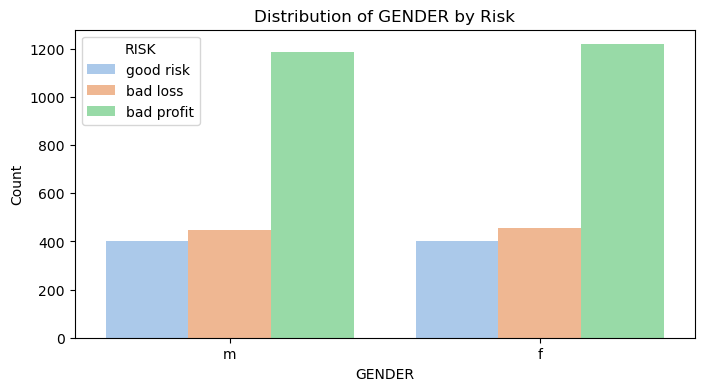

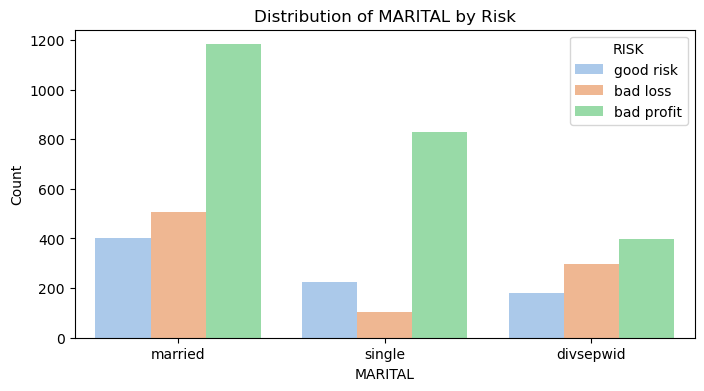

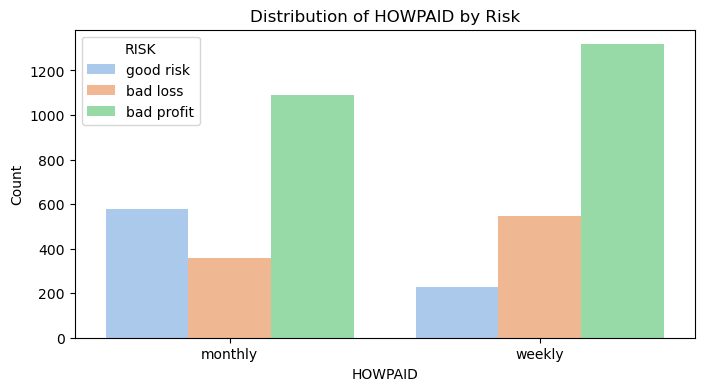

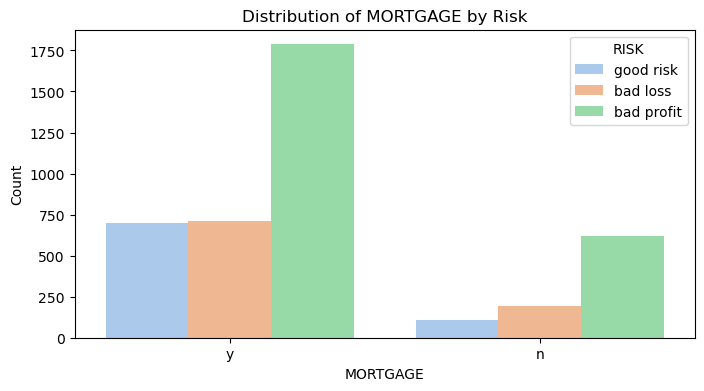

In [19]:
# List of categorical features
categorical_features = ['GENDER', 'MARITAL', 'HOWPAID', 'MORTGAGE']
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='RISK', palette='pastel')
    plt.title(f'Distribution of {col} by Risk')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='RISK')
    plt.show()

In [20]:
#HISTOGRAM TO CHECK NUMERICAL VALUES DISTRIBUTION

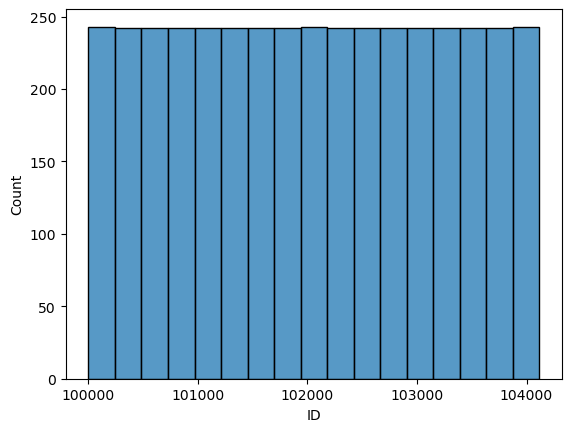

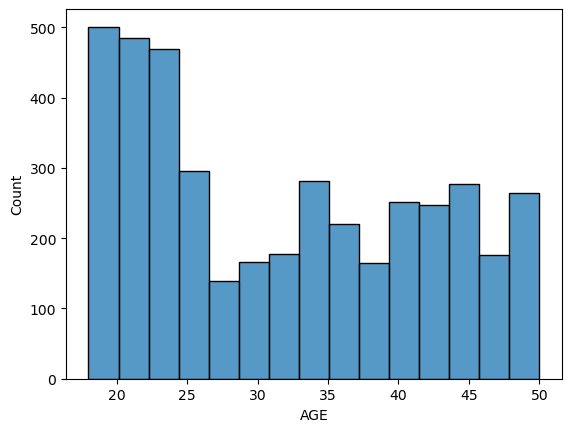

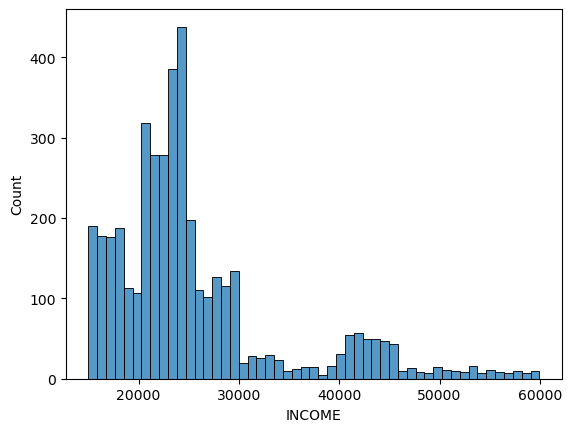

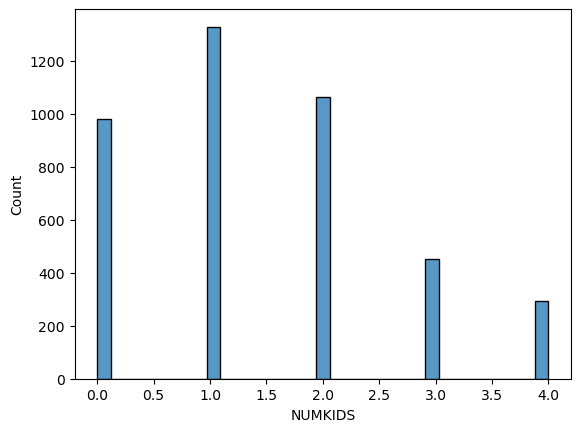

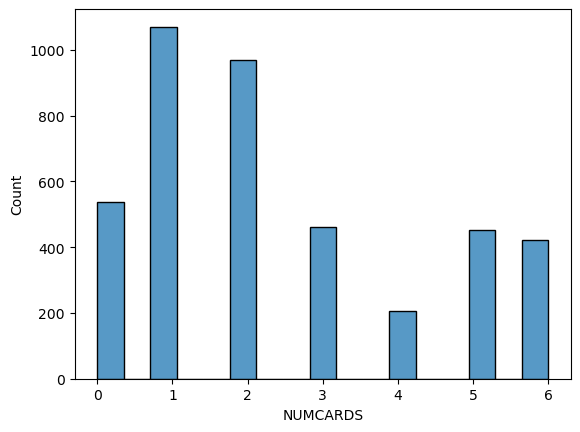

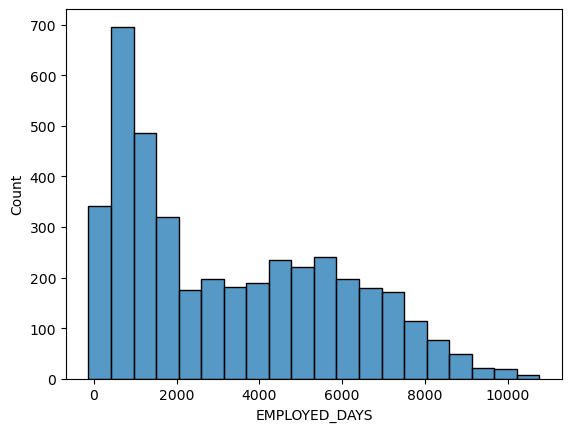

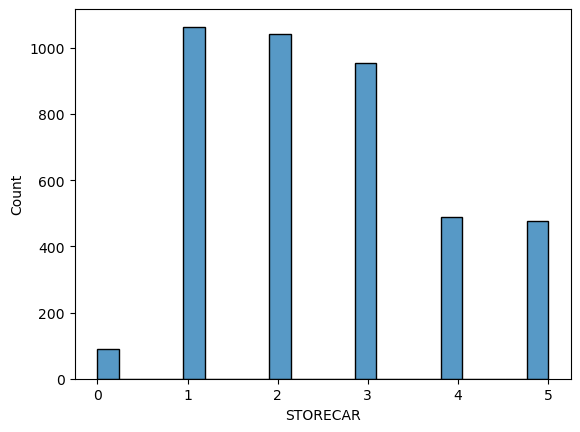

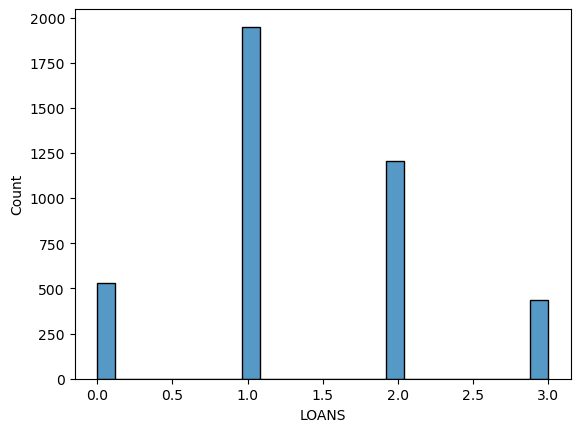

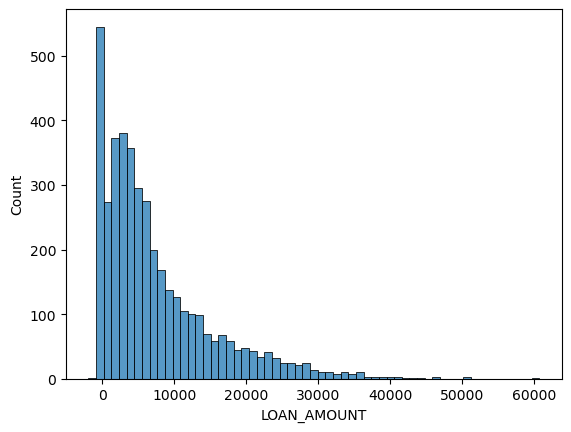

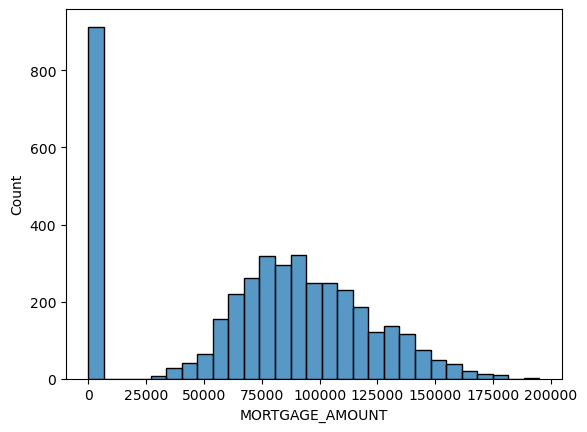

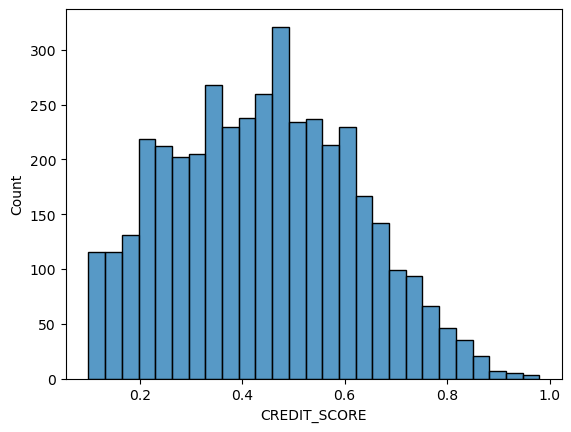

In [21]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

In [22]:
#BOX PLOT TO SEE OUTLIER

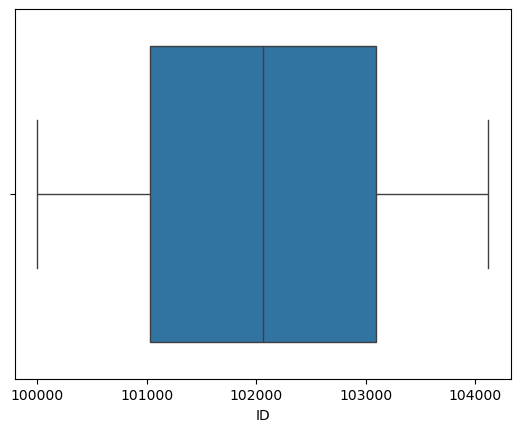

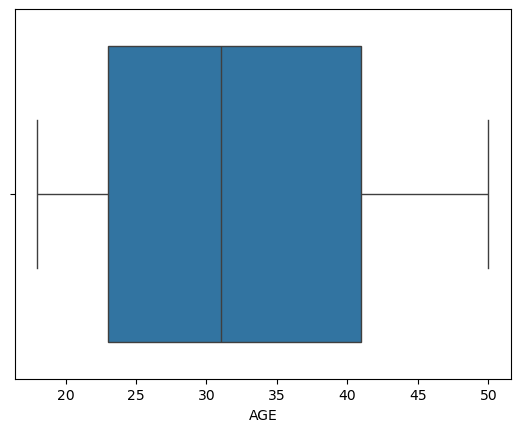

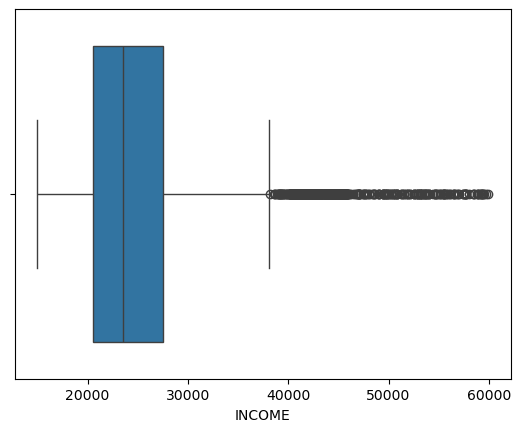

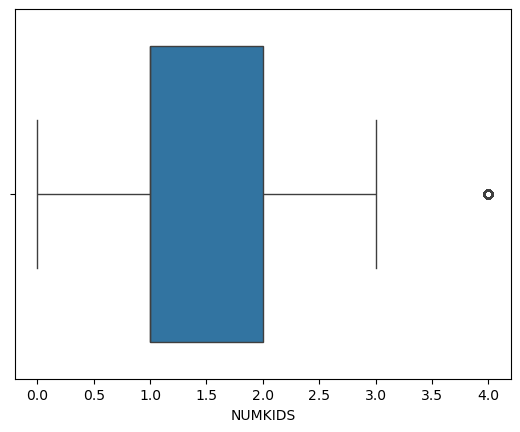

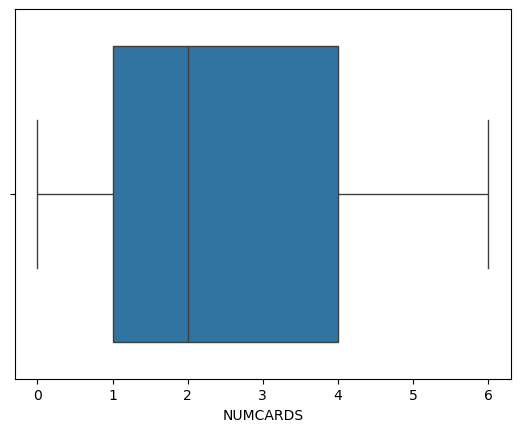

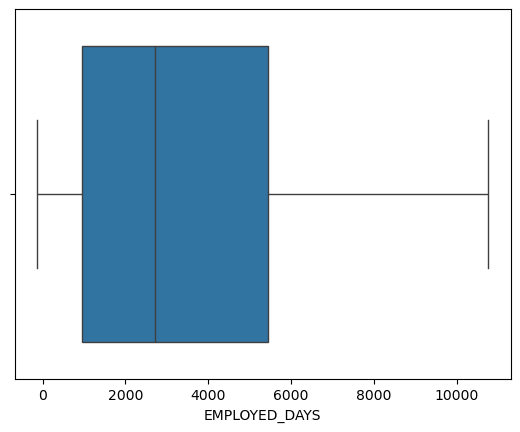

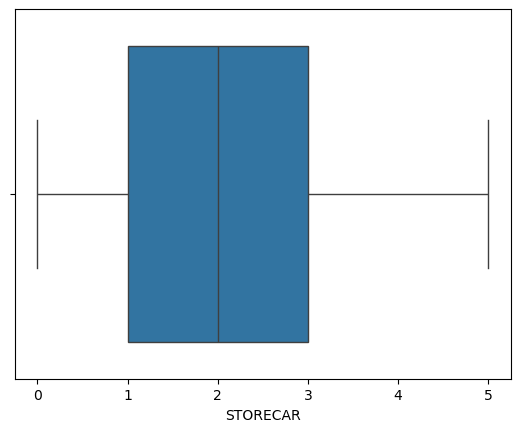

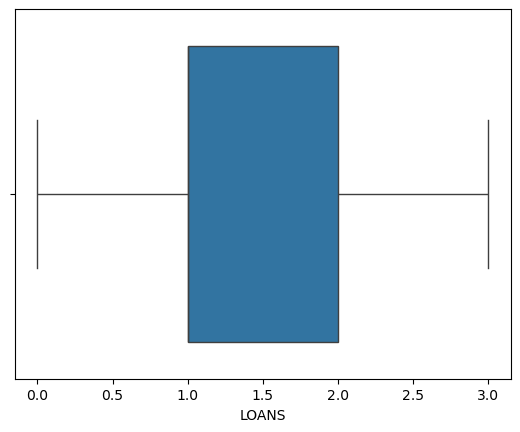

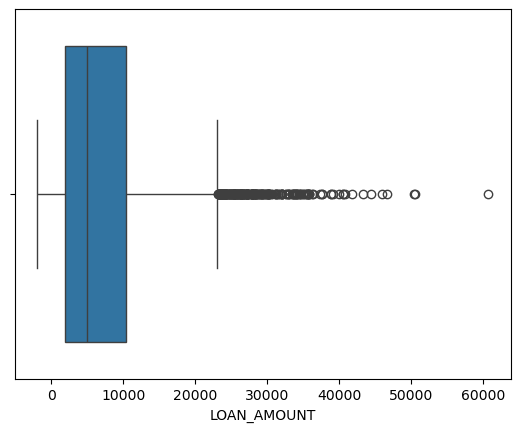

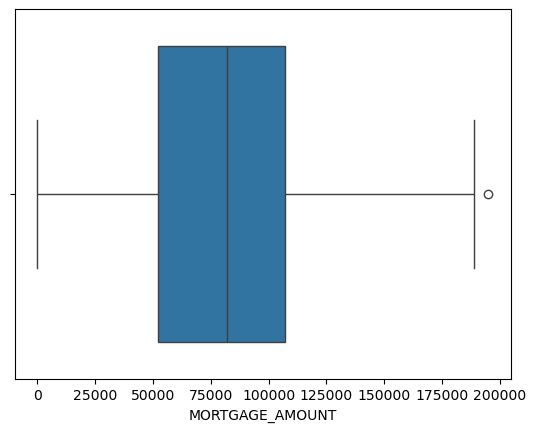

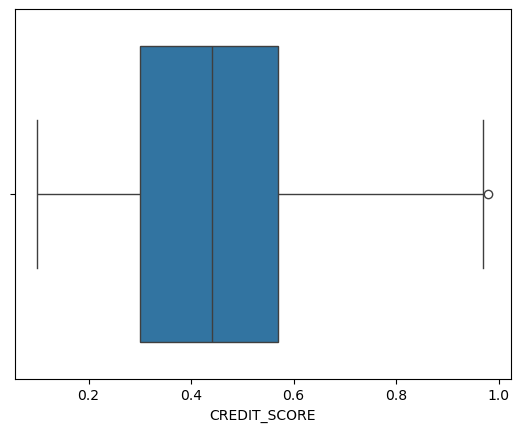

In [23]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [24]:
#OUTLINERS TO BE DELETED , NUM OF KIDS , MORTGAE AMOUNT

In [25]:
#label encoder to map data

In [26]:
mapping = {}
cat_col = ['RISK','MARITAL','GENDER','MORTGAGE','HOWPAID']
for col in cat_col:
    le = LabelEncoder()
    # fit and transform the column
    df[col] = le.fit_transform(df[col])
    # store the mapping for each column
    mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))

for feature,mappin in mapping.items():
    print(f"{feature} : {mapping}")

RISK : {'RISK': {'bad loss': np.int64(0), 'bad profit': np.int64(1), 'good risk': np.int64(2)}, 'MARITAL': {'divsepwid': np.int64(0), 'married': np.int64(1), 'single': np.int64(2)}, 'GENDER': {'f': np.int64(0), 'm': np.int64(1)}, 'MORTGAGE': {'n': np.int64(0), 'y': np.int64(1)}, 'HOWPAID': {'monthly': np.int64(0), 'weekly': np.int64(1)}}
MARITAL : {'RISK': {'bad loss': np.int64(0), 'bad profit': np.int64(1), 'good risk': np.int64(2)}, 'MARITAL': {'divsepwid': np.int64(0), 'married': np.int64(1), 'single': np.int64(2)}, 'GENDER': {'f': np.int64(0), 'm': np.int64(1)}, 'MORTGAGE': {'n': np.int64(0), 'y': np.int64(1)}, 'HOWPAID': {'monthly': np.int64(0), 'weekly': np.int64(1)}}
GENDER : {'RISK': {'bad loss': np.int64(0), 'bad profit': np.int64(1), 'good risk': np.int64(2)}, 'MARITAL': {'divsepwid': np.int64(0), 'married': np.int64(1), 'single': np.int64(2)}, 'GENDER': {'f': np.int64(0), 'm': np.int64(1)}, 'MORTGAGE': {'n': np.int64(0), 'y': np.int64(1)}, 'HOWPAID': {'monthly': np.int64(0),

In [27]:
df.head()

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,RISK
0,100756,44,59944,1,1,1,2,0,6503,2,0,0,1,155000,0.73,2
1,100668,35,59692,1,1,1,1,0,5842,1,0,0,1,144000,0.46,0
2,100418,34,59508,1,1,1,1,0,2649,2,1,25370,1,157000,0.53,2
3,100416,34,59463,1,1,0,2,0,3423,1,1,28220,1,135000,0.31,0
4,100590,39,59393,0,1,0,2,0,4964,1,0,0,1,145000,0.81,2


In [28]:
#FINDING CORRELATION

In [29]:
cor1=df.corr()
cor1

,ID,AGE,INCOME,GENDER,MARITAL,NUMKIDS,NUMCARDS,HOWPAID,EMPLOYED_DAYS,STORECAR,LOANS,LOAN_AMOUNT,MORTGAGE,MORTGAGE_AMOUNT,CREDIT_SCORE,RISK
ID,1.000000,0.410873,-0.462983,-0.007404,-0.375194,0.626440,0.744172,0.487319,0.382663,0.732640,0.607441,0.392658,-0.365844,-0.243610,-0.269202,-0.457619
AGE,0.410873,1.000000,0.294707,-0.015734,-0.539455,0.434555,0.600475,0.151054,0.945604,0.477989,0.257589,0.503192,-0.096146,0.168324,0.014975,-0.083007
INCOME,-0.462983,0.294707,1.000000,0.024181,-0.026052,-0.283403,-0.139417,-0.377157,0.282746,-0.255995,-0.407229,0.117307,0.189473,0.437743,0.253975,0.300987
GENDER,-0.007404,-0.015734,0.024181,1.000000,-0.002596,0.003682,-0.009315,0.001842,0.071427,-0.005192,0.002580,0.042568,0.008616,0.014578,-0.012952,0.003426
MARITAL,-0.375194,-0.539455,-0.026052,-0.002596,1.000000,-0.761357,-0.662584,-0.409845,-0.526647,-0.563921,-0.698715,-0.580513,0.068374,-0.154548,0.098265,0.133905
NUMKIDS,0.626440,0.434555,-0.283403,0.003682,-0.761357,1.000000,0.666882,0.468565,0.421490,0.663088,0.696792,0.463928,-0.142668,0.095883,-0.183288,-0.313815
NUMCARDS,0.744172,0.600475,-0.139417,-0.009315,-0.662584,0.666882,1.000000,0.472300,0.573488,0.687450,0.635079,0.543911,-0.385312,-0.163668,-0.131289,-0.235907
HOWPAID,0.487319,0.151054,-0.377157,0.001842,-0.409845,0.468565,0.472300,1.000000,0.151642,0.404539,0.527711,0.280174,-0.245518,-0.212557,-0.137837,-0.202333
EMPLOYED_DAYS,0.382663,0.945604,0.282746,0.071427,-0.526647,0.421490,0.573488,0.151642,1.000000,0.458966,0.254453,0.520781,-0.094737,0.159358,0.012859,-0.085510
STORECAR,0.732640,0.477989,-0.255995,-0.005192,-0.563921,0.663088,0.687450,0.404539,0.458966,1.000000,0.577863,0.425332,-0.204966,-0.040415,-0.228018,-0.355632


Text(0.5, 1.0, 'Correlation Matrix')

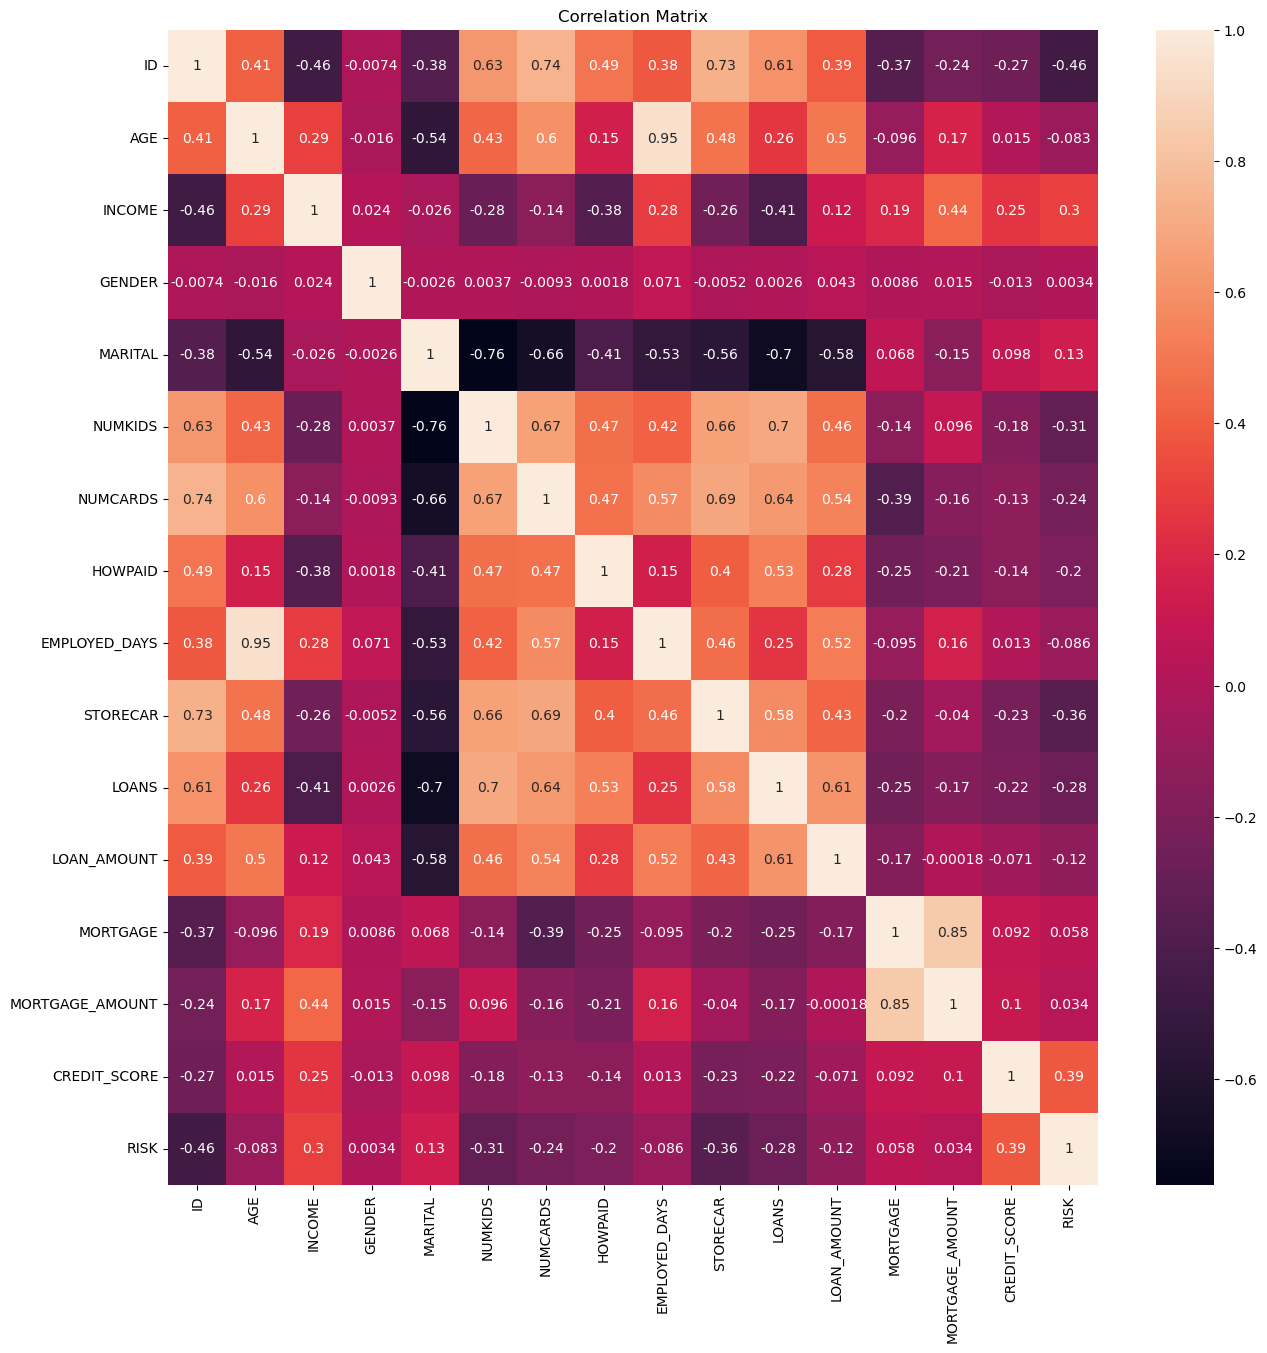

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(cor1,annot=True)
plt.title("Correlation Matrix")

In [31]:
#gender correlation with RISK OUT TARGET IS VERY LOW SO WE CAN DROP GENDER AND ID

In [32]:
df.drop(columns=['ID'],inplace=True)
df.drop(columns=['GENDER'],inplace=True)

In [33]:
df.columns

Index(['AGE', 'INCOME', 'MARITAL', 'NUMKIDS', 'NUMCARDS', 'HOWPAID',
       'EMPLOYED_DAYS', 'STORECAR', 'LOANS', 'LOAN_AMOUNT', 'MORTGAGE',
       'MORTGAGE_AMOUNT', 'CREDIT_SCORE', 'RISK'],
      dtype='object')

In [34]:
#outlier treatment for NUM OF KIDS , MORTGAE AMOUNT

In [35]:
features = ['NUMKIDS', 'MORTGAGE_AMOUNT']

for feature in features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    
    # Option 1: Remove outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    
    # Option 2: Cap outliers to the nearest boundary
    # df[feature] = df[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Now 'df' is treated for outliers in 'number_of_kids' and 'mortgage_amount'


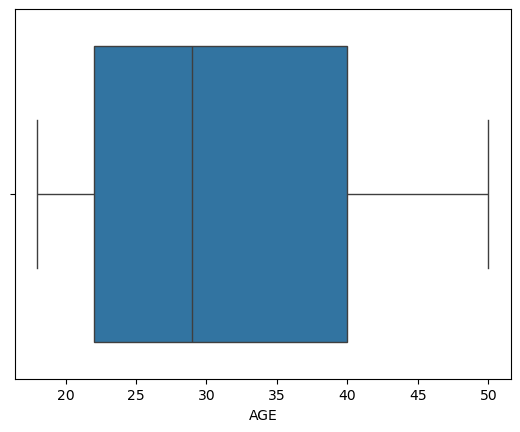

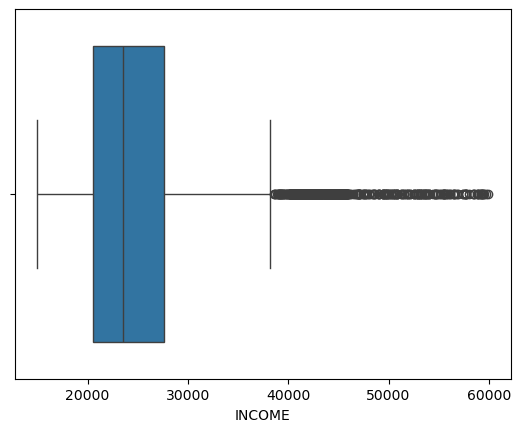

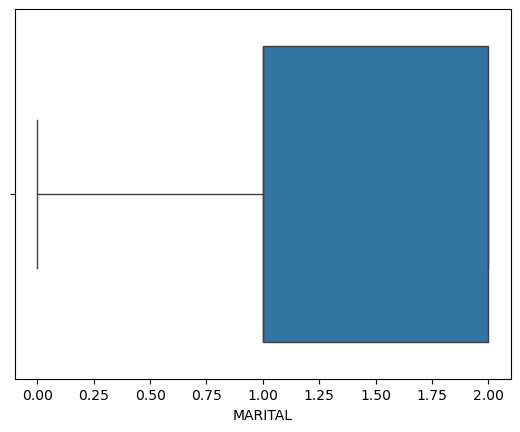

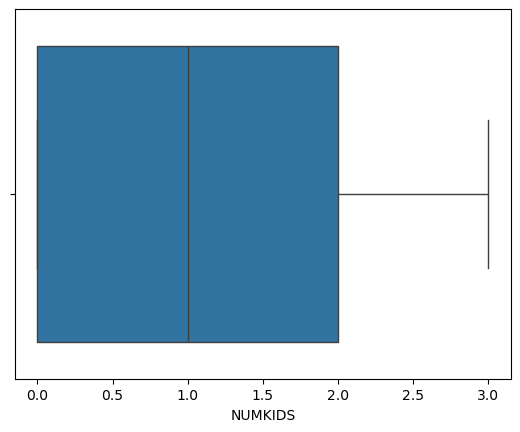

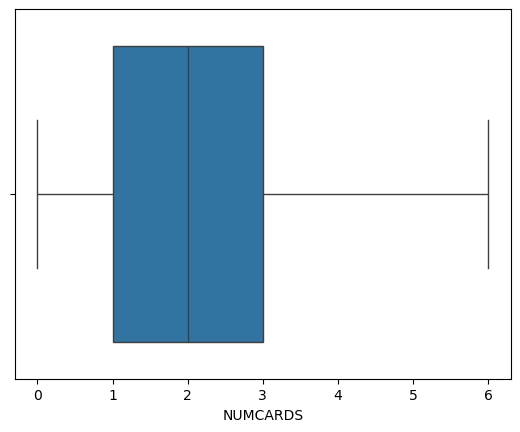

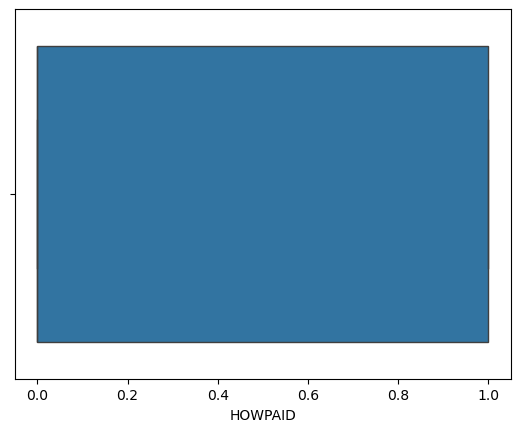

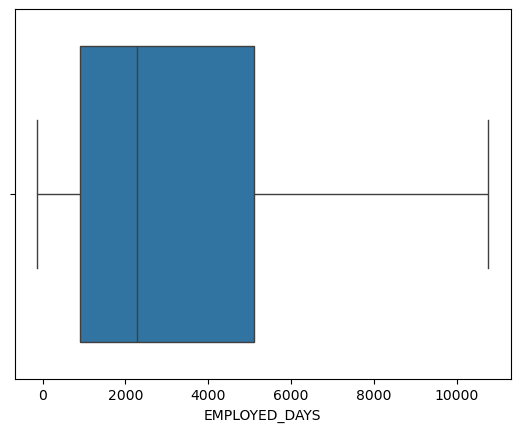

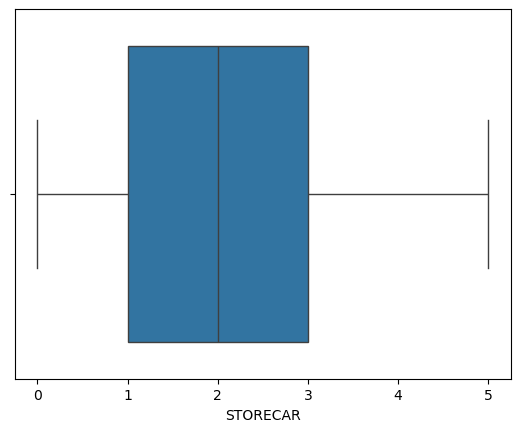

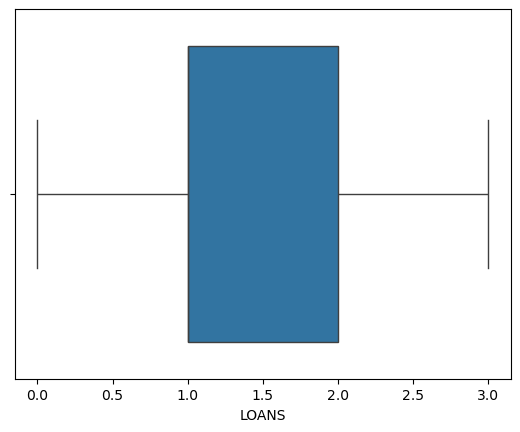

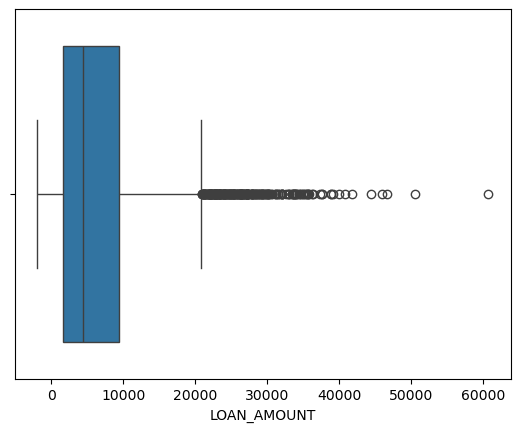

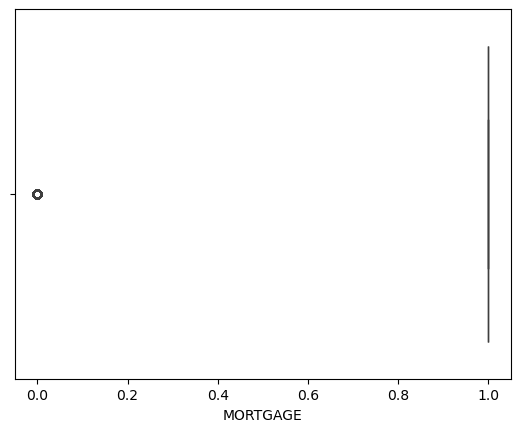

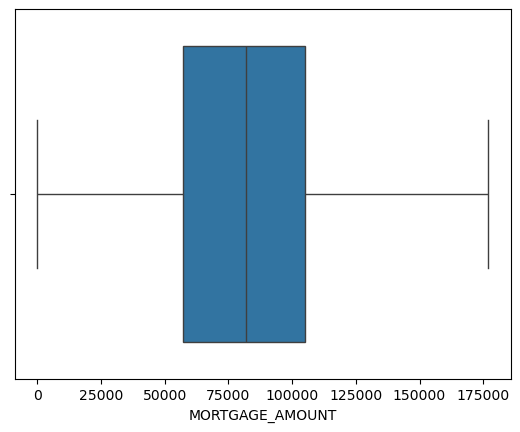

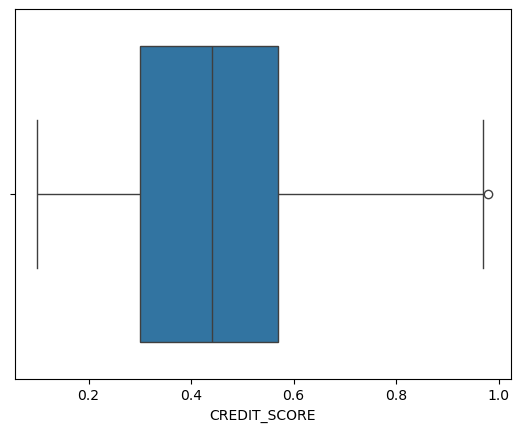

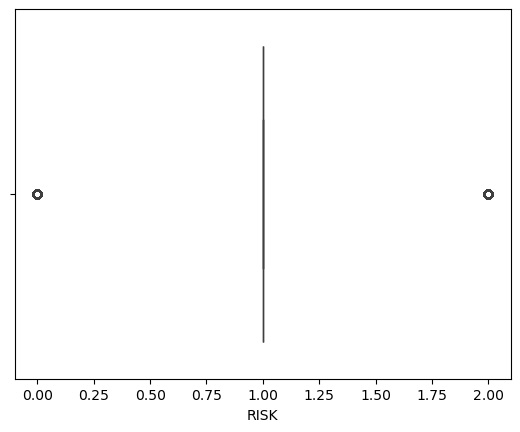

In [36]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [37]:
#NOW BALACING DATA SET

In [42]:
df["RISK"].value_counts(True)

RISK
1    0.593979
0    0.212304
2    0.193717
Name: proportion, dtype: float64

In [44]:
x = df.drop('RISK',axis=1)
y = df['RISK']

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto',random_state=42)
x_resampled,y_resampled = smote.fit_resample(x,y)
# Convert resampled arrays back to DataFrame for easier plotting
df_resampled = pd.DataFrame(x_resampled)
df_resampled['RISK'] = y_resampled

In [46]:
y_resampled.value_counts(True)

RISK
2    0.333333
0    0.333333
1    0.333333
Name: proportion, dtype: float64

In [ ]:
#APPLYING SCALLING

In [47]:
mc = MinMaxScaler()
x_scaled = mc.fit_transform(x_resampled)
x_resampled = pd.DataFrame(x_scaled,columns=x_resampled.columns)

In [48]:
#TESTING DATA

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)


In [50]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=None)            # Increase number of trees
    
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy


np.float64(84.73)

In [52]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.8472834067547724
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       650
           1       0.81      0.83      0.82       684
           2       0.89      0.91      0.90       709

    accuracy                           0.85      2043
   macro avg       0.85      0.85      0.85      2043
weighted avg       0.85      0.85      0.85      2043



In [53]:
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 0.9997900923593619
Test Accuracy: 0.8472834067547724


In [54]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=200,
                                learning_rate=0.05,
                                max_depth=100,
                                min_samples_split = 50,
                                min_samples_leaf=10,
                                subsample=0.8,
                                max_features='sqrt',
                                random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

np.float64(85.27)

In [55]:
train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Train Accuracy: 1.0
Test Accuracy: 0.8526676456191875
